In [40]:
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split #데이터 전처리 - train, test 분리 random_state=42
from sklearn.neighbors import KNeighborsClassifier #분류/ 데이터 학습하기
from sklearn.neighbors import KNeighborsRegressor  #회귀 예측
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression #선형회귀
from sklearn.preprocessing import PolynomialFeatures #끝난 뒤 특성을 추가해서 모델을 적용
from sklearn.preprocessing import StandardScaler #표준화작업 (instead of 데이터값 - 평균/ 표준편차) - 전처리 전
from sklearn.linear_model import Ridge #릿지회귀
from scipy.special import softmax # 행 하나하나 1로 맞춤
from sklearn.linear_model import LogisticRegression #로지스틱 - 맞출 확률을 나타내는 것(1에 가깝게)
from sklearn.linear_model import SGDClassifier #경사하강법 - 머신러닝을 훈련하는 방법, 다 끝나고 정답률 높이기 위해 
from statsmodels.stats.outliers_influence import variance_inflation_factor #회귀분석 예측 - 고려사항 체크
import statsmodels.api as sm # train set 평가서 볼 수 있는 모듈
from sklearn.model_selection import cross_validate # 머신러닝 - cross_validate
from sklearn.ensemble import RandomForestClassifier
from collections import Counter #counter 함수

from scipy import stats # t-test
from tensorflow import keras
from konlpy.tag import Okt  #텍스트마이닝
import operator
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import oracledb
import random
import seaborn as sns
import glob,os.path,re
import seaborn as sns
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [41]:
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0

In [42]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(100,activation='relu')) # sigmoid 
model.add(keras.layers.Dense(10,activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state= 42
)

In [45]:
# 검증손실 - 확인방법 history: fit(validation_data)

In [46]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled,train_target, epochs =20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 909us/step - accuracy: 0.7670 - loss: 0.6674 - val_accuracy: 0.8457 - val_loss: 0.4300
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 826us/step - accuracy: 0.8584 - loss: 0.3949 - val_accuracy: 0.8631 - val_loss: 0.3780
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - accuracy: 0.8707 - loss: 0.3522 - val_accuracy: 0.8685 - val_loss: 0.3584
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step - accuracy: 0.8821 - loss: 0.3230 - val_accuracy: 0.8767 - val_loss: 0.3474
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - accuracy: 0.8887 - loss: 0.3044 - val_accuracy: 0.8718 - val_loss: 0.3525
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - accuracy: 0.8915 - loss: 0.2892 - val_accuracy: 0.8810 - val_loss: 0.3363
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - accuracy: 0.8965 - loss: 0.2772 - val_accuracy: 0.8829 - val_loss: 0.3256
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - accuracy: 0.9027 -

In [47]:
history.history['accuracy']

[0.8144583106040955,
 0.8592291474342346,
 0.8708124756813049,
 0.8810625076293945,
 0.8881666660308838,
 0.8927500247955322,
 0.8973541855812073,
 0.9022916555404663,
 0.9055833220481873,
 0.9096875190734863,
 0.9113749861717224,
 0.9146875143051147,
 0.9166874885559082,
 0.9188125133514404,
 0.9229583144187927,
 0.9238125085830688,
 0.925125002861023,
 0.9273958206176758,
 0.9287708401679993,
 0.9310625195503235]

In [48]:
history.history['loss']

[0.5261784195899963,
 0.3894236981868744,
 0.3535368740558624,
 0.3266140818595886,
 0.30695396661758423,
 0.29038140177726746,
 0.2788037061691284,
 0.26611849665641785,
 0.2546910345554352,
 0.24494211375713348,
 0.2380157858133316,
 0.23112380504608154,
 0.22288303077220917,
 0.21637019515037537,
 0.21083061397075653,
 0.20482763648033142,
 0.20062384009361267,
 0.19398008286952972,
 0.1890425682067871,
 0.18393747508525848]

Text(0, 0.5, 'loss')

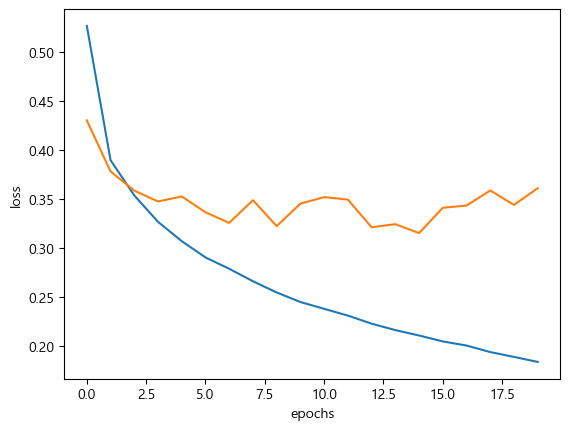

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

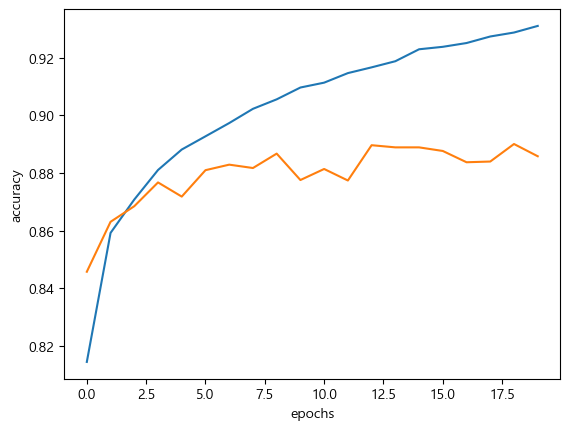

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

dropout\
epochs를 증가할 때 훈련세트에는 정확도가 높은데 검증세트에는 정확도가 높지 않음

In [51]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(100,activation='relu')) # sigmoid 
model.add(keras.layers.Dropout(0.3)) # 30퍼센트를 제외시키는 규제 적용
model.add(keras.layers.Dense(10,activation='softmax'))

In [52]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled,train_target, epochs =20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7362 - loss: 0.7616 - val_accuracy: 0.8456 - val_loss: 0.4336
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.8369 - loss: 0.4537 - val_accuracy: 0.8648 - val_loss: 0.3765
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 866us/step - accuracy: 0.8504 - loss: 0.4043 - val_accuracy: 0.8682 - val_loss: 0.3665
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 852us/step - accuracy: 0.8612 - loss: 0.3811 - val_accuracy: 0.8699 - val_loss: 0.3533
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - accuracy: 0.8701 - loss: 0.3637 - val_accuracy: 0.8800 - val_loss: 0.3349
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8685 - loss: 0.3506 - val_accuracy: 0.8781 - val_loss: 0.3380
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8750 - loss: 0.3374 - val_accuracy: 0.8723 - val_loss: 0.3480
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8810 - loss: 0

Text(0, 0.5, 'loss')

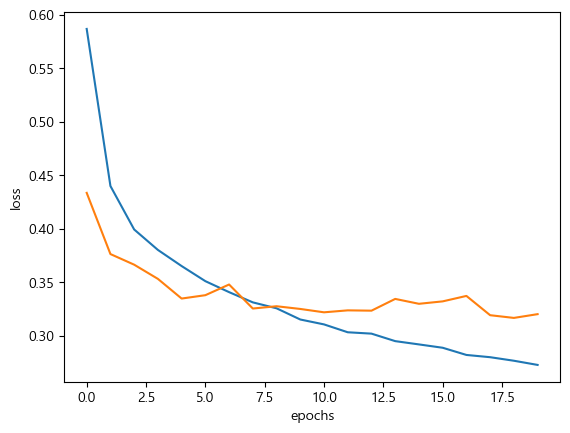

In [54]:
# dropout 후 손실률 줄어들음

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

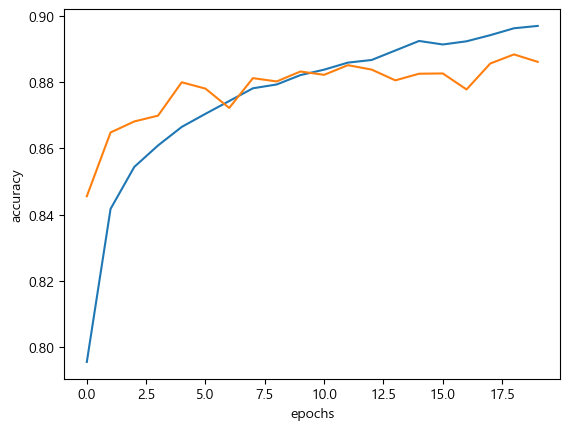

In [55]:
# dropout 후 gap 줄어들음


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

모델 저장과 복원
- save_weight: 가중치만 저장 (',,,,.weights.h5') ->파일명
- save: 모델저장 (',,,,.h5') ->파일명

In [67]:
model.save_weights('model0529.weights.h5')

In [57]:
model.save('model_all.h5')

In [ ]:
# 머신러닝
# 모델결정 model = keras.Sequential()
# Flatten 추가  model.add(keras.layers.Flatten(input_shape=(28,28)))
# Dense층 추가  model.add(keras.layers.Dense(100,activation='relu'))
# Dense층 추가  model.add(keras.layers.Dense(10,activation='softmax'))
# model.summary()
# 모델설정 옵티마이저 - adam(최적화 알고리즘 찾는 것 -> 최저 손실률을 찾음)
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 모델훈련 model.fit(train_scaled,train_target,batch_size=32,epochs=5)
# 모델평가 model.evaluate(val_scaled,val_target)

In [ ]:
# 딥러닝
# 모델결정 model = keras.Sequential()
# Flatten 추가  model.add(keras.layers.Flatten(input_shape=(28,28)))
# Dense층 추가  model.add(keras.layers.Dense(100,activation='relu'))
# Dropout층 추가 model.add(keras.layers.Dropout(0.3)) # 30퍼센트를 제외시키는 규제 적용
# Dense층 추가  model.add(keras.layers.Dense(10,activation='softmax'))
# model.summary()
# 모델설정 옵티마이저 - adam(최적화 알고리즘 찾는 것 -> 최저 손실률을 찾음)
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 모델훈련 history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,validation_data=(val_scaled, val_target))
# 모델평가 model.evaluate(val_scaled,val_target)